In [1]:
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import scipy.stats as stats

## Resultado da integral exata

In [2]:
func = lambda x: (np.exp(x) - 1)/(np.exp(1) - 1)

In [3]:
EXACT_INT = 0.41802

## Monte Carlo tosco

In [4]:
def get_crude_montecarlo(N):
    randoms = [rnd.random() for i in range(N)]
    results = func(randoms)
    exp_res = sum(results)/N
    var_res = sum((results - exp_res)**2)/N
    ret = [exp_res, 2*np.sqrt(var_res)]
    return ret

In [5]:
std_err = lambda x: (1/(len(x)-1)) * sum((x-np.mean(x))**2)

## Monte Carlo Estratificado

In [6]:
def get_stratif_montecarlo(N, num_strats):
    a = [i/num_strats for i in range(num_strats+1)]

    results = []
    s_sqr = 0
    for j in range(1, num_strats+1):
        n_j = 0
        randoms = []
        for l in range(1, N):
            r = a[j-1] + (a[j] - a[j-1]) * rnd.random()
            res = (a[j] - a[j-1]) * func(r)
            randoms.append(r)

            n_j += res
        results.append(n_j)

        ffs = (func(randoms) - sum(func(randoms))/N)**2
        s_sqr += ((a[j] - a[j-1])**2)/(N*(N-1))

    exp_res = sum(results) / N
    ret = [exp_res, 2*np.sqrt(s_sqr)]
    return ret

In [7]:
func_inv = lambda y: np.log((np.exp(1) - 1)*y + 1)

In [8]:
def get_stratif_montecarlo_by_f(N, num_strats):
    a = [func_inv(i/num_strats) for i in range(num_strats+1)]
    #print(a)

    results = []
    s_sqr = 0
    for j in range(1, num_strats+1):
        n_j = 0
        randoms = []
        for l in range(1, N):
            r = a[j-1] + (a[j] - a[j-1]) * rnd.random()
            res = (a[j] - a[j-1]) * func(r)
            randoms.append(r)

            n_j += res
        results.append(n_j)

    ffs = (func(randoms) - sum(func(randoms))/N)**2
    s_sqr += ((a[j] - a[j-1])**2)/(N*(N-1))

    exp_res = sum(results)/N
    ret = [exp_res, 2*np.sqrt(s_sqr)]
    return ret


## Resultados

### Considerando N=20 pontos e 4 estratos (em ambos X e **Y**)

In [9]:
mc_0 = get_crude_montecarlo(20)
mc_1 = get_stratif_montecarlo(20, 4)
mc_2 = get_stratif_montecarlo_by_f(20, 4)

print("Monte Carlo Tosco: \n", "{}({})\n\n".format(mc_0[0], mc_0[1]))
print("Monte Carlo Estratificado em X: \n", "{}({})\n\n".format(mc_1[0], mc_1[1]))
print("Monte Carlo Estratificado em Y: \n", "{}({})\n\n".format(mc_2[0], mc_2[1]))

Monte Carlo Tosco: 
 0.37691714053681735(0.48411087798862257)


Monte Carlo Estratificado em X: 
 0.40397752895021116(0.051298917604257706)


Monte Carlo Estratificado em Y: 
 0.38826304205296136(0.01764796246560198)




Onde o primeiro termo representa o valor estimado $\hat\theta$ e entre parênteses, metade do intervalo de confiança $\sigma$

### Considerando N crescente, mantendo 4 estratos (em ambos X e Y)

In [10]:
N=200
crude_values_f = []
crude_values_var_f = []

n_strats = 4
strat_values_f = []
strat_values_var_f = []

stratY_values_f = []
stratY_values_var_f = []

for i in range(2,N):
    crude = get_crude_montecarlo(i)
    crude_values_f.append(crude[0])
    crude_values_var_f.append(crude[1])

    strat = get_stratif_montecarlo(i, num_strats=n_strats)
    strat_values_f.append(strat[0])
    strat_values_var_f.append(strat[1])

    stratY = get_stratif_montecarlo_by_f(i, num_strats=n_strats)
    stratY_values_f.append(stratY[0])
    stratY_values_var_f.append(stratY[1])

X = [i for i in range(2,N)]

In [1]:
plt.figure(figsize=(18,10))
s_sqr = std_err(crude_values_f)
plt.suptitle("Convergência ao valor esperado:\nMétodos tosco e estratificado em x", fontsize=18)

#plt.errorbar(X, crude_values_f, yerr=np.sqrt(s_sqr), alpha=.6, label=r'Erro padrão $\sigma$: Tosco')
plt.fill_between(X, np.array(crude_values_f) + np.array(crude_values_var_f), np.array(crude_values_f) - np.array(crude_values_var_f), alpha=.3)
plt.plot(X, crude_values_f, 'o-', color='red', markeredgecolor='k', label='Monte Carlo Tosco')
plt.hlines(EXACT_INT, 0, N, label='Teórico')

#plt.errorbar(X, strat_values_f, yerr=strat_values_var_f, alpha=.6, label=r'Erro padrão $\sigma$: Estrat.')
plt.fill_between(X, np.array(strat_values_f) - np.array(strat_values_var_f), np.array(strat_values_f) + np.array(strat_values_var_f), alpha=.3)
plt.plot(X, strat_values_f, 'o', color='blue', markeredgecolor='k', label=r"Estratificado, $n_{st}$ = 4")

plt.ylabel('Valor esperado', fontsize=13)
plt.xlabel(r"$N$ Amostras", fontsize=13)

#plt.ylim(0.1,)
plt.grid()
plt.legend(loc='lower right')
plt.show()

NameError: name 'plt' is not defined

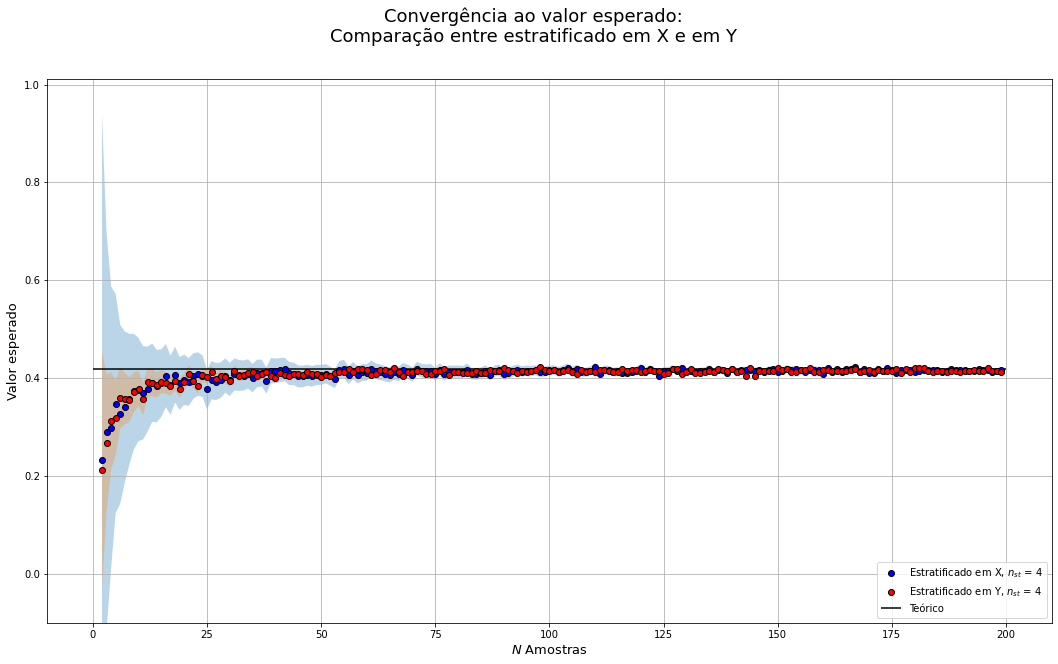

In [12]:
plt.figure(figsize=(18,10))
s_sqr = std_err(crude_values_f)
plt.suptitle("Convergência ao valor esperado:\nComparação entre estratificado em X e em Y", fontsize=18)

plt.fill_between(X, np.array(strat_values_f) - np.array(strat_values_var_f), np.array(strat_values_f) + np.array(strat_values_var_f), alpha=.3)
plt.plot(X, strat_values_f, 'o', color='blue', markeredgecolor='k', label=r"Estratificado em X, $n_{st}$ = 4")

plt.fill_between(X, np.array(stratY_values_f) - np.array(stratY_values_var_f), np.array(stratY_values_f) + np.array(stratY_values_var_f), alpha=.3)
plt.plot(X, stratY_values_f, 'o', color='red', markeredgecolor='k', label=r"Estratificado em Y, $n_{st}$ = 4")
plt.hlines(EXACT_INT, 0, N, label='Teórico')

plt.ylabel('Valor esperado', fontsize=13)
plt.xlabel(r"$N$ Amostras", fontsize=13)

plt.ylim(-0.1,)
plt.grid()
plt.legend()
plt.legend(loc='lower right')

plt.show()

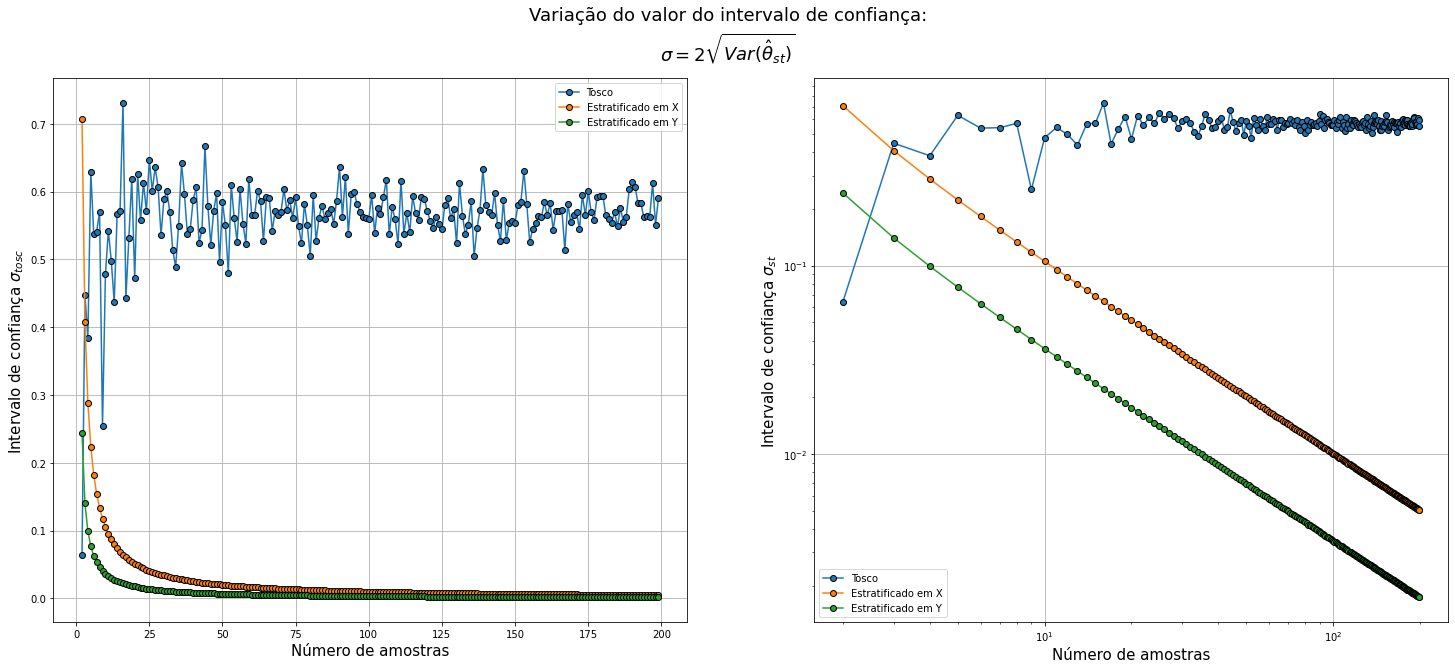

In [15]:
fig, axs = plt.subplots(1,2,figsize=(25,10))
plt.suptitle(r"Variação do valor do intervalo de confiança:" + "\n" + r"$\sigma = 2\sqrt{Var(\hat\theta_{st})}$", fontsize=18)
axs[0].plot(X, crude_values_var_f, 'o-', markeredgecolor='k', label='Tosco')
axs[0].plot(X, strat_values_var_f, 'o-', markeredgecolor='k', label='Estratificado em X')
axs[0].plot(X, stratY_values_var_f, 'o-', markeredgecolor='k', label='Estratificado em Y')

axs[0].grid()

axs[0].set_xlabel('Número de amostras', fontsize=15)
axs[0].set_ylabel(r'Intervalo de confiança $\sigma_{tosc}$', fontsize=15)

axs[1].plot(X, crude_values_var_f, 'o-', markeredgecolor='k', label='Tosco')
axs[1].plot(X, strat_values_var_f, 'o-', markeredgecolor='k', label='Estratificado em X')
axs[1].plot(X, stratY_values_var_f, 'o-', markeredgecolor='k',label='Estratificado em Y')

axs[1].grid()

axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('Número de amostras', fontsize=15)
axs[1].set_ylabel(r'Intervalo de confiança $\sigma_{st}$', fontsize=15)

axs[0].legend()
axs[1].legend()

plt.show()